## Problem 2: German Credit Dataset (72 points)
> Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it.

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
df = pd.read_csv('GermanCredit.csv')

In [27]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


---

### Preprocessing (31 pts)

---
1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [28]:
#1 - drop the 3 columns that contribute the least to the dataset
lst = []
for col in df:
    unique_values = df[col].unique()
    if 'none' in map(str, unique_values):
        lst.append((col, df[col].value_counts()['none']))
    else:
        lst.append((col, 0))
new_lst = sorted(lst, key=lambda x: x[1])[-3:]
cols = [col for col,_ in new_lst]
print(cols)
df.drop(columns=cols, inplace=True)

['own_telephone', 'other_payment_plans', 'other_parties']


In [29]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [30]:
#2 - remove unnecessary apostrophes from values in columns
df['credit_history'].unique()

array(["'critical/other existing credit'", "'existing paid'",
       "'delayed previously'", "'no credits/all paid'", "'all paid'"],
      dtype=object)

In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        df[col] = df[col].str.replace("'", "")

checking_status
credit_history
purpose
savings_status
employment
personal_status
property_magnitude
housing
job
foreign_worker
class


In [32]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   residence_since         1000 non-null   int64 
 10  property_magnitude      1000 non-null   object
 11  age                     1000 non-null   int64 
 12  housing                 1000 non-null   object
 13  existing_credits        1000 non-null   int64 
 14  job                     1000 non-null   object
 15  num_d

3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [34]:
#3 - change 'no checking', '<0', '0<=X<200', and '>=200' to 'No Checking', 'Low', 'Medium', and 'High' respectively
df['checking_status'] = df['checking_status'].str.replace('no checking', 'No Checking')
df['checking_status'] = df['checking_status'].str.replace('<0', 'Low')
df['checking_status'] = df['checking_status'].str.replace('0<=X<200', 'Medium')
df['checking_status'] = df['checking_status'].str.replace('>=200', 'High')

In [35]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [36]:
#4 - change 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000' to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively
df['savings_status'] = df['savings_status'].str.replace('no known savings', 'No Savings')
df['savings_status'] = df['savings_status'].str.replace('>=1000', 'High')
df['savings_status'] = df['savings_status'].str.replace('500<=X<1000', 'High')
df['savings_status'] = df['savings_status'].str.replace('100<=X<500', 'Medium')
df['savings_status'] = df['savings_status'].str.replace('<100', 'Low')

In [37]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.

In [38]:
#5 - change 'good' to '1' and 'bad' to '0'
df['class'] = df['class'].str.replace('good', '1')
df['class'] = df['class'].str.replace('bad', '0')

In [39]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [40]:
#6 - 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range
df['employment'] = df['employment'].str.replace('unemployed', 'Unemployed')
df['employment'] = df['employment'].str.replace('<1', 'Amateur')
df['employment'] = df['employment'].str.replace('1<=X<4', 'Professional')
df['employment'] = df['employment'].str.replace('4<=X<7', 'Experienced')
df['employment'] = df['employment'].str.replace('>=7', 'Expert')

In [41]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


---

### Analysis (17 pts)

---
1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.
> a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).  
> b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.

In [42]:
#1a - get the count of each category of foreign workers (yes and no) for each class of credit (good and bad)
pd.crosstab(df['foreign_worker'], df['class'])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [43]:
#1b - get the count of each category of employment for each category of saving_status
pd.crosstab(df['employment'], df['savings_status'])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [44]:
df['savings_status'].unique()

array(['No Savings', 'Low', 'High', 'Medium'], dtype=object)

2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [45]:
#2 - find the average credit_amount of single males that have 4<=X<7 years of employment
#for val in df['credit_amount'].values: df.loc[:, 'weight'].mean()
count = 0
credit_sum = 0
for i in range(df.shape[0]):
    if df.loc[i, 'personal_status'] == 'male single' and df.loc[i, 'employment'] == 'Experienced':
        credit_sum += df.loc[i, 'credit_amount']
        count += 1
avg = credit_sum/count
print(avg)

4142.592592592592


3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [46]:
#3 - find the average credit duration for each of the job types
df.groupby('job')['credit_amount'].mean()

job
high qualif/self emp/mgmt    5435.493243
skilled                      3070.965079
unemp/unskilled non res      2745.136364
unskilled resident           2358.520000
Name: credit_amount, dtype: float64

4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
> Most common checking status: ...  
> Most common savings status: ...

In [47]:
#4 - what is the most common checking_status and savings_status?
checking = df['checking_status'].value_counts()
saving = df['savings_status'].value_counts()
print('Most common checking status:', ''.join(checking[checking == checking.max()].index.tolist()))
print('Most common savings status:', ''.join(saving[saving == saving.max()].index.tolist()))

Most common checking status: No Checking
Most common savings status: Low


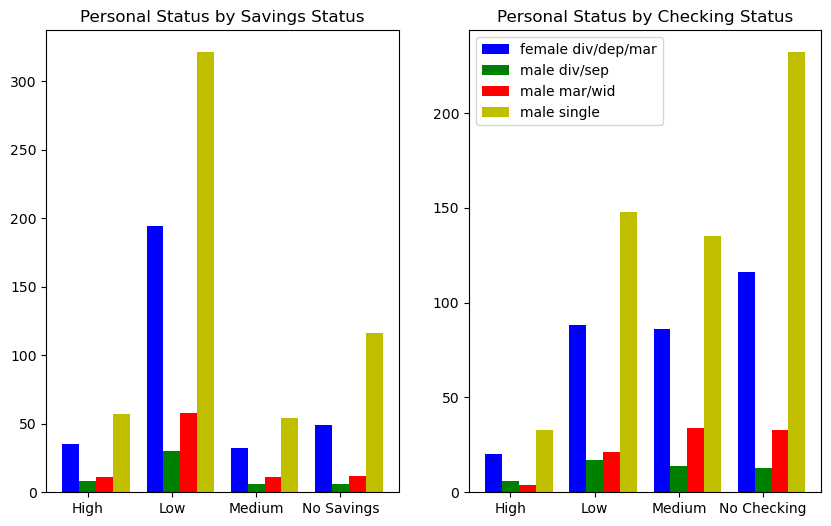

In [48]:
#1 - bar chart for savings_status (x-axis) to personal status (y-axis) and checking_status (x-axis) to personal_status (y-axis)
savings_counts = pd.crosstab(df['savings_status'], df['personal_status'])
checking_counts = pd.crosstab(df['checking_status'], df['personal_status'])

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
r1 = range(len(savings_counts))
r2 = [x + 0.2 for x in r1]
r3 = [x + 0.2 for x in r2]
r4 = [x + 0.2 for x in r3]

axes[0].set_title('Personal Status by Savings Status')
axes[0].bar(r1, savings_counts['female div/dep/mar'], color='b', width=0.2, label='female div/dep/mar')
axes[0].bar(r2, savings_counts['male div/sep'], color='g', width=0.2, label='male div/sep')
axes[0].bar(r3, savings_counts['male mar/wid'], color='r', width=0.2, label='male mar/wid')
axes[0].bar(r4, savings_counts['male single'], color='y', width=0.2, label='male single')
axes[0].set_xticks([r + 0.2 for r in range(len(savings_counts))])
axes[0].set_xticklabels(['High', 'Low', 'Medium', 'No Savings'])

axes[1].set_title('Personal Status by Checking Status')
axes[1].bar(r1, checking_counts['female div/dep/mar'], color='b', width=0.2, label='female div/dep/mar')
axes[1].bar(r2, checking_counts['male div/sep'], color='g', width=0.2, label='male div/sep')
axes[1].bar(r3, checking_counts['male mar/wid'], color='r', width=0.2, label='male mar/wid')
axes[1].bar(r4, checking_counts['male single'], color='y', width=0.2, label='male single')
axes[1].set_xticks([r + 0.2 for r in range(len(checking_counts))])
axes[1].set_xticklabels(['High', 'Low', 'Medium', 'No Checking'])

plt.legend()
plt.show()

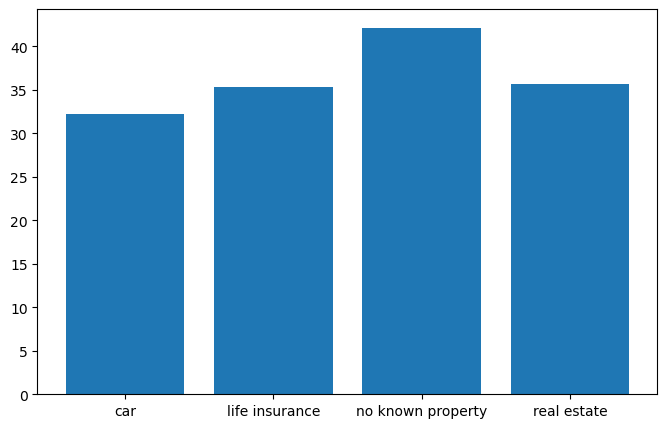

In [49]:
#2 - for people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis)
mag = sorted(df['property_magnitude'].unique())
filtered_df = df[df['credit_amount'] > 4000]
age = filtered_df.groupby('property_magnitude')['age'].mean()
plt.figure(figsize=(8,5))
plt.bar(mag, age)
plt.show()

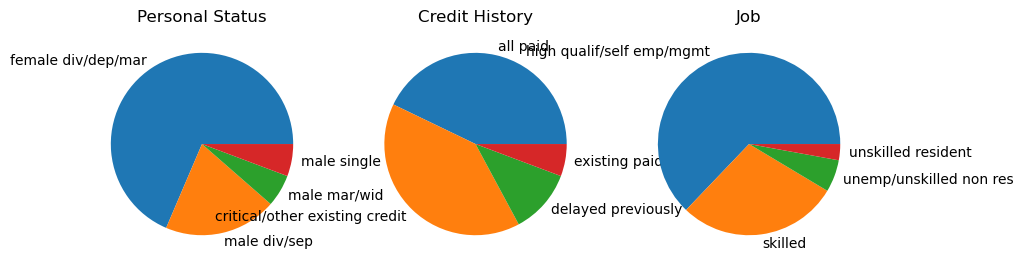

In [56]:
#3 - for people with a "High" savings_status and age above 40, use subplots to plot the following pie charts: personal status, credit history, and job
filtered_df = df[(df['savings_status'] == 'High') & (df['age'] > 40)]
personal = sorted(filtered_df['personal_status'].unique())
credit = sorted(filtered_df['credit_history'].unique())
job = sorted(filtered_df['job'].unique())

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

axes[0].set_title('Personal Status')
axes[0].pie(filtered_df['personal_status'].value_counts().tolist(), labels=personal)
axes[1].set_title('Credit History')
axes[1].pie(filtered_df['credit_history'].value_counts().tolist(), labels=credit)
axes[2].set_title('Job')
axes[2].pie(filtered_df['job'].value_counts().tolist(), labels=job)

plt.show()